### **Analyzing High Latency Elevance AOAI calls from Thu Jun 06 and Jun 08**


In [1]:
import pandas as pd

file_path = 'C:\\Users\\pablosal\\Desktop\\gbbai-azure-openai-benchmark\\utils\\Elevance_Latency_Analysis_Data.xlsx'

try:
    df = pd.read_excel(file_path, sheet_name='main', engine='openpyxl')
except FileNotFoundError:
    print(f"File not found: {file_path}")
except ValueError as e:
    print(f"Value error occurred: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

columns_to_convert = [
    '6/6 GPT-4 Response Time (seconds) - Elevance Logs',
    '6/8 GPT-4 Response Time (seconds) - Elevance Logs',
    '6/6 (assuming same for 6/8 ?) Completion Tokens - Elevance Logs',
    '6/6 (assuming same for 6/8 ?) Prompt Tokens - Elevance Logs',
    '6/6 Latency in seconds (Old Request) - MSFT logs',
    '6/8 Latency in seconds (New Request) - MSFT logs'
]

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [2]:
df.head()

,6/6 Timestamp (UTC) - Elevance Logs,6/6 Tokens Usage - Elevance Logs,6/6 GPT-4 Response Time (seconds) - Elevance Logs,Created - Elevance Logs,ID - Elevance Logs,6/8 Timestamp - Elevance Logs,6/8 GPT-4 Response Time (seconds) - Elevance Logs,6/6 (assuming same for 6/8 ?) Completion Tokens - Elevance Logs,6/6 (assuming same for 6/8 ?) Prompt Tokens - Elevance Logs,6/6 Latencies observed in AOAI for the old request - MSFT logs,6/8 Latencies observed in AOAI for the new request - MSFT logs,6/6 Latency in seconds (Old Request) - MSFT logs,6/8 Latency in seconds (New Request) - MSFT logs
0,2024-06-06T23:01:04.793025,"Completion: 106, Prompt: 781, Total: 887",67.20,1717714861,chatcmpl-9XGOLrsHrhIzCjcNViOepwbFcJbnb,2024-06-08T21:23:40.209654,4.3,106,781,"PreciseTimeStamp: 2024-06-06T23:01:06.921Z, Re...","PreciseTimeStamp: 2024-06-08T21:23:40.891Z, Re...",3.307,3.211
1,2024-06-06T19:44:12.880672,"Completion: 141, Prompt: 2218, Total: 2359",30.52,1717703045,chatcmpl-9XDJlembp12VARVnlUBzu6JpbHTji,2024-06-08T21:25:28.874760,5.2,141,2218,"PreciseTimeStamp: 2024-06-06T19:44:14.54Z, Req...","PreciseTimeStamp: 2024-06-08T21:25:30.193Z, Re...",7.265,5.116
2,2024-06-06T19:27:05.154826,"Completion: 104, Prompt: 372, Total: 476",37.27,1717702019,chatcmpl-9XD3DYKHPOwJkiWUPs9EwQOgX6CKd,2024-06-08T21:26:39.346837,2.4,104,372,"PreciseTimeStamp: 2024-06-06T19:27:05.932Z, Re...","PreciseTimeStamp: 2024-06-08T21:26:39.999Z, Re...",5.558,2.405
3,2024-06-06T19:01:57.984820,"Completion: 133, Prompt: 733, Total: 866",69.13,Searching,Searching,2024-06-08T21:27:33.386549,5.6,133,733,"PreciseTimeStamp: 2024-06-06T19:01:58.838Z, Re...","PreciseTimeStamp: 2024-06-08T21:27:34.018Z, Re...",5.062,5.589
4,2024-06-06T17:40:34.880587,"Completion: 56, Prompt: 395, Total: 451",64.55,1717695570,chatcmpl-9XBNCci5e02wiDvAOphZRGBNcyA1T,2024-06-08T21:28:16.250115,2.2,56,395,"PreciseTimeStamp: 2024-06-06T17:41:02.416Z, Re...","PreciseTimeStamp: 2024-06-08T21:28:17.107Z, Re...",5.148,2.157


In [3]:
differences = df[["6/6 GPT-4 Response Time (seconds) - Elevance Logs", "6/6 Latency in seconds (Old Request) - MSFT logs", "6/8 GPT-4 Response Time (seconds) - Elevance Logs", "6/8 Latency in seconds (New Request) - MSFT logs"]]

columns_to_round = [
    '6/6 GPT-4 Response Time (seconds) - Elevance Logs',
    '6/6 Latency in seconds (Old Request) - MSFT logs',
    '6/8 GPT-4 Response Time (seconds) - Elevance Logs',
    '6/8 Latency in seconds (New Request) - MSFT logs'
]

for column in columns_to_round:
    differences[column] = differences[column].round(2)

differences['6/6 % Difference (Elevance vs MSFT)'] = ((differences['6/6 GPT-4 Response Time (seconds) - Elevance Logs'] - differences['6/6 Latency in seconds (Old Request) - MSFT logs']) / differences['6/6 Latency in seconds (Old Request) - MSFT logs']) * 100
differences['6/8 % Difference (Elevance vs MSFT)'] = ((differences['6/8 GPT-4 Response Time (seconds) - Elevance Logs'] - differences['6/8 Latency in seconds (New Request) - MSFT logs']) / differences['6/8 Latency in seconds (New Request) - MSFT logs']) * 100

def color_columns(val):
    if val.name in ['6/8 GPT-4 Response Time (seconds) - Elevance Logs', '6/8 Latency in seconds (New Request) - MSFT logs']:
        color = ['#ADD8E6'] * len(val)  # Light blue
    elif val.name in ['6/6 GPT-4 Response Time (seconds) - Elevance Logs', '6/6 Latency in seconds (Old Request) - MSFT logs']:
        color = ['white'] * len(val)
    elif val.name in ['6/6 % Difference (Elevance vs MSFT)', '6/8 % Difference (Elevance vs MSFT)']:
        color = ['green' if v <= 0 else 'red' for v in val]
    return ['color: %s' % c for c in color]

differences_styled = differences.style.apply(color_columns)

differences_styled = differences_styled.set_properties(subset=['6/6 % Difference (Elevance vs MSFT)', '6/8 % Difference (Elevance vs MSFT)'], **{'font-weight': 'bold'})

differences_styled = differences_styled.set_caption("Note: Red color indicates a difference found between the Elevance logs and the MSFT logs. Green color indicates the logs match.")

display(differences_styled)

C:\Users\pablosal\AppData\Local\Temp\ipykernel_5824\2234687605.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences[column] = differences[column].round(2)
C:\Users\pablosal\AppData\Local\Temp\ipykernel_5824\2234687605.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences['6/6 % Difference (Elevance vs MSFT)'] = ((differences['6/6 GPT-4 Response Time (seconds) - Elevance Logs'] - differences['6/6 Latency in seconds (Old Request) - MSFT logs']) / differences['6/6 Latency in seconds (Old

,6/6 GPT-4 Response Time (seconds) - Elevance Logs,6/6 Latency in seconds (Old Request) - MSFT logs,6/8 GPT-4 Response Time (seconds) - Elevance Logs,6/8 Latency in seconds (New Request) - MSFT logs,6/6 % Difference (Elevance vs MSFT),6/8 % Difference (Elevance vs MSFT)
0,67.200000,3.310000,4.300000,3.210000,1930.211480,33.956386
1,30.520000,7.260000,5.200000,5.120000,320.385675,1.562500
2,37.270000,5.560000,2.400000,2.400000,570.323741,0.000000
3,69.130000,5.060000,5.600000,5.590000,1266.205534,0.178891
4,64.550000,5.150000,2.200000,2.160000,1153.398058,1.851852


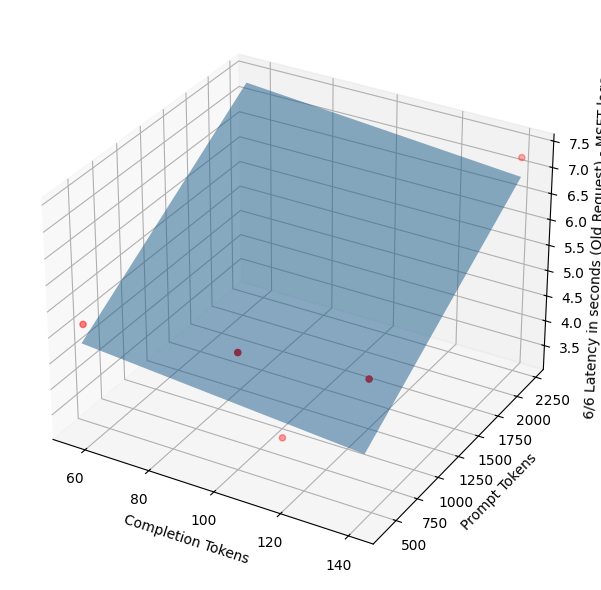

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression

# Reshape the data to fit the model
X = df[['6/6 (assuming same for 6/8 ?) Completion Tokens - Elevance Logs', '6/6 (assuming same for 6/8 ?) Prompt Tokens - Elevance Logs']].values
Y = df['6/6 Latency in seconds (Old Request) - MSFT logs'].values

# Fit the model
model = LinearRegression()
model.fit(X, Y)

# Create a grid of points over which to evaluate the model
x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), num=10)
y_range = np.linspace(X[:, 1].min(), X[:, 1].max(), num=10)
x_grid, y_grid = np.meshgrid(x_range, y_range)
z_grid = model.predict(np.c_[x_grid.ravel(), y_grid.ravel()]).reshape(x_grid.shape)

# Plot the original data and the plane
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, c='r', marker='o')
ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('Completion Tokens')
ax.set_ylabel('Prompt Tokens')
ax.set_zlabel('6/6 Latency in seconds (Old Request) - MSFT logs', labelpad=1)

plt.tight_layout()
plt.show()

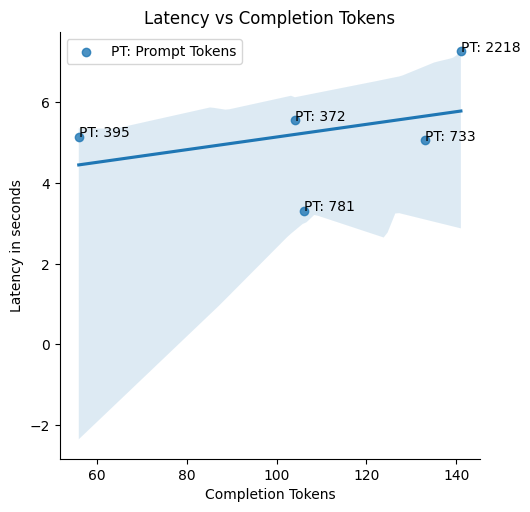

In [16]:
import seaborn as sns

# Create a scatter plot with a regression line
plot = sns.lmplot(x='6/6 (assuming same for 6/8 ?) Completion Tokens - Elevance Logs', y='6/6 Latency in seconds (Old Request) - MSFT logs', data=df)

# Add the amount of input tokens as text on each data point
for i in range(df.shape[0]):
    plt.text(df['6/6 (assuming same for 6/8 ?) Completion Tokens - Elevance Logs'].iloc[i], df['6/6 Latency in seconds (Old Request) - MSFT logs'].iloc[i], 'PT: ' + str(df['6/6 (assuming same for 6/8 ?) Prompt Tokens - Elevance Logs'].iloc[i]))

# Set the title and labels
plt.title('Latency vs Completion Tokens')
plt.xlabel('Completion Tokens')
plt.ylabel('Latency in seconds')

# Add a custom legend
plt.legend(['PT: Prompt Tokens'])

plt.show()

In [21]:
# Reshape the data to fit the model
df[['6/6 Latency in seconds (Old Request) - MSFT logs', '6/8 Latency in seconds (New Request) - MSFT logs', '6/6 (assuming same for 6/8 ?) Prompt Tokens - Elevance Logs','6/6 Latency in seconds (Old Request) - MSFT logs']]


,6/6 Latency in seconds (Old Request) - MSFT logs,6/8 Latency in seconds (New Request) - MSFT logs,6/6 (assuming same for 6/8 ?) Prompt Tokens - Elevance Logs,6/6 Latency in seconds (Old Request) - MSFT logs
0,3.307,3.211,781,3.307
1,7.265,5.116,2218,7.265
2,5.558,2.405,372,5.558
3,5.062,5.589,733,5.062
4,5.148,2.157,395,5.148
